In [17]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt

class MeanRevStrategy:
    def __init__(self, price_data):
        self.price_data = price_data  # DataFrame with timestamp indexed asset prices
        self.leverage = 50
        self.initial_portfolio_value = 2000

    def calculate_zscore(self, spread_series, window):
        mean = spread_series.rolling(window=window).mean()
        std = spread_series.rolling(window=window).std()
        z_score = (spread_series - mean) / std
        return z_score

    def simulate_trade(self, market, POSITION_SIZE, Z_SCORE, window):
        spread_series = self.price_data[market]
        z_score_series = self.calculate_zscore(spread_series, window)

        # Initialize portfolio values tracking
        portfolio_value = self.initial_portfolio_value
        in_position = False
        position_type = None  # Track whether the position is long or short

        for idx in range(len(self.price_data)):
            current_z_score = z_score_series.iloc[idx]
            current_price = spread_series.iloc[idx]
            trade_return = 0.0

            # Flipping positions based on Z_SCORE threshold
            if in_position:
                # Calculate return based on price change since entry
                price_increase = (current_price - entry_price) * ((POSITION_SIZE * self.leverage) / entry_price)
                if position_type == "long" and current_z_score >= Z_SCORE:
                    trade_return = price_increase - (POSITION_SIZE * self.leverage) * 0.02
                    in_position, position_type, entry_price = False, None, None
            elif not in_position:
                if current_z_score <= -Z_SCORE:  # Enter long position
                    in_position, position_type, entry_price = True, "long", current_price

            portfolio_value += trade_return

        # Exiting the last open position at the end of the data
        if in_position:
            # Simulate exiting the position with no additional profit or loss
            in_position, position_type = False, None

        # Returning the portfolio values for further analysis
        return portfolio_value

    def run_monte_carlo_simulation(self, iterations, window_range, z_score_range, output_name):
        simulation_results = []

        for _ in range(iterations):
            WINDOW = np.random.randint(*window_range)
            POSITION_SIZE = 1
            Z_SCORE = np.random.uniform(*z_score_range)
            total_returns = self.trade_all_markets(WINDOW, POSITION_SIZE, Z_SCORE)
            simulation_results.append({
                'returns': total_returns,
                'window': WINDOW,
                'position_size': POSITION_SIZE,
                'z_score': Z_SCORE
            })

        # Save all simulation results to a JSON file
        with open(f'{output_name}_simulation_results.json', 'w') as f:
            json.dump(simulation_results, f, indent=4)

        return simulation_results

    def trade_all_markets(self, WINDOW, POSITION_SIZE, Z_SCORE):
        total_returns = 0.0
        for market in self.price_data.columns:
            if market == 'time':
                continue

            portfolio_value = self.simulate_trade(market, POSITION_SIZE, Z_SCORE, WINDOW)
            returns = portfolio_value - self.initial_portfolio_value
            total_returns += returns

        return total_returns

# Example usage:
# Assuming you have a DataFrame `df` with a 'time' column and market price columns
# strategy = MeanRevStrategy(df)
# simulation_results = strategy.run_monte_carlo_simulation(iterations=1000)


In [7]:
data_15m = pd.read_csv('data_test_15m.csv')
data_15m = data_15m.tail(2000)

strategy = MeanRevStrategy(data_15m)
params_15m = strategy.run_monte_carlo_simulation(1000, (200, 400), (2.5, 3.5), '15m')

In [43]:
data_1H = pd.read_csv('data_test_1H.csv')
data_1H = data_1H.tail(2000)

strategy = MeanRevStrategy(data_1H)
params_15m = strategy.run_monte_carlo_simulation(1000, (100, 600), (2.0, 4.0), '1H')

In [36]:
data_15m = pd.read_csv('data_test_15m.csv')

strategy = MeanRevStrategy(data_15m)
params_15m = strategy.run_monte_carlo_simulation(1000, (100, 800), (1.5, 4.5), '15m')

In [37]:
data_1H = pd.read_csv('data_test_1H.csv')

strategy_1H = MeanRevStrategy(data_1H)
params_1H = strategy_1H.run_monte_carlo_simulation(2000, (100, 800), (1.5, 5.5), '1H')

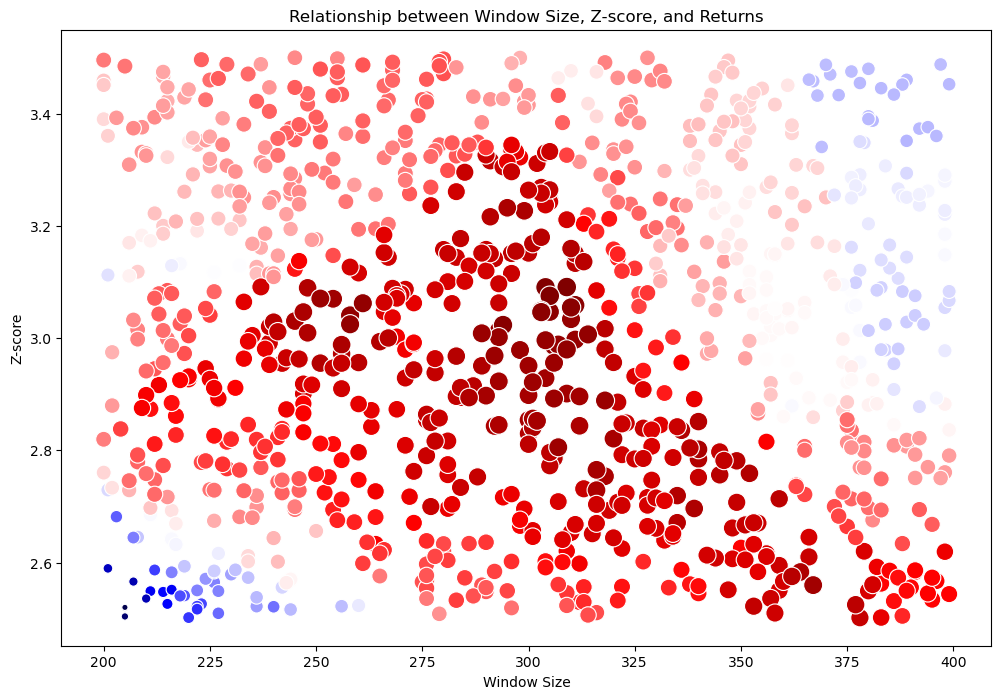

In [9]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the simulation results
with open('simulation_results.json', 'r') as f:
    simulation_results = json.load(f)

# Convert the results to a DataFrame
df = pd.DataFrame(simulation_results)

# Create the scatter plot with color representing returns
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    data=df,
    x='window',
    y='z_score',
    hue='returns',
    palette='seismic',
    size='returns',
    sizes=(20, 200),
    legend=None
)

plt.title('Relationship between Window Size, Z-score, and Returns')
plt.xlabel('Window Size')
plt.ylabel('Z-score')

plt.show()




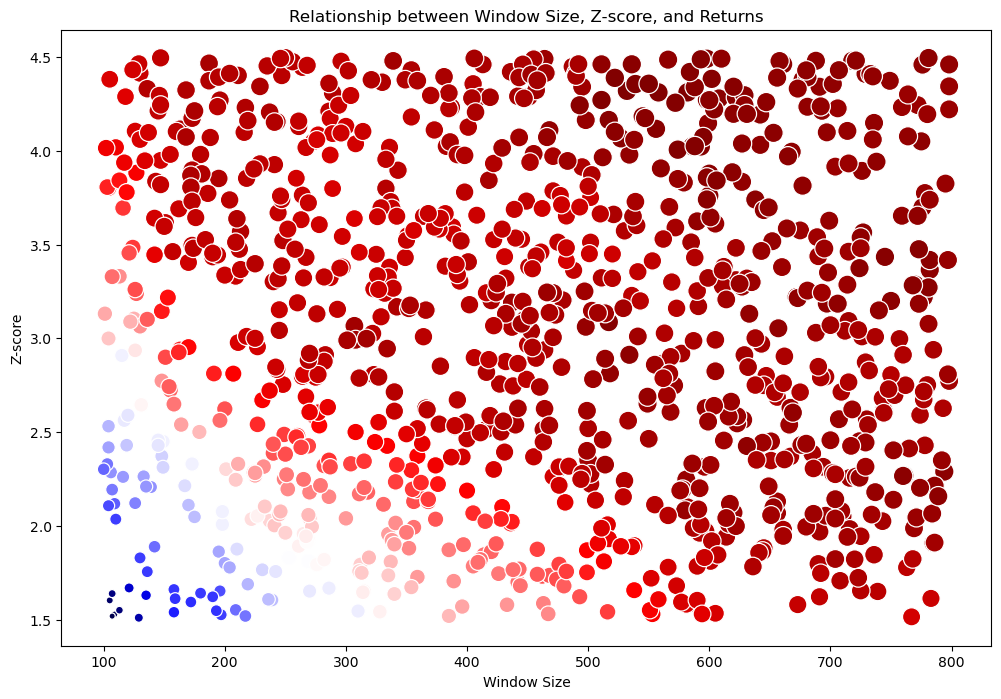

In [39]:
# Load the simulation results
with open('15m_simulation_results.json', 'r') as f:
    simulation_results = json.load(f)

# Convert the results to a DataFrame
df = pd.DataFrame(simulation_results)

# Create the scatter plot with color representing returns
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    data=df,
    x='window',
    y='z_score',
    hue='returns',
    palette='seismic',
    size='returns',
    sizes=(20, 200),
    legend=None
)

plt.title('Relationship between Window Size, Z-score, and Returns')
plt.xlabel('Window Size')
plt.ylabel('Z-score')

plt.show()

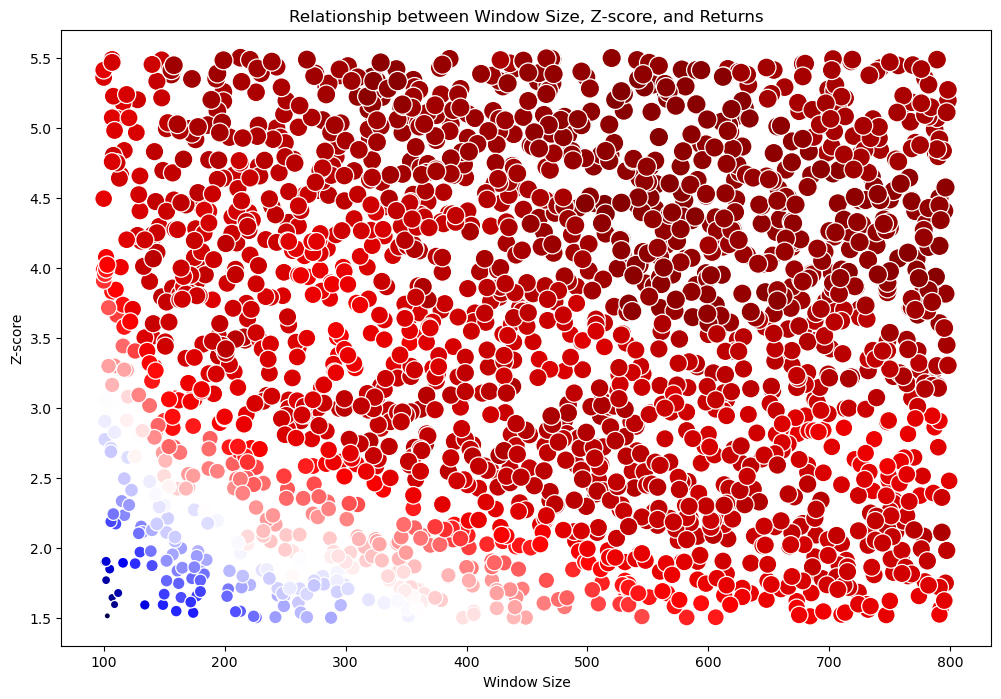

In [40]:
# Load the simulation results
with open('1H_full_simulation_results.json', 'r') as f:
    simulation_results_1H = json.load(f)

# Convert the results to a DataFrame
df = pd.DataFrame(simulation_results_1H)
# df['return_cat'] = np.where(df['returns'] > 0, 'Positive', 'Negative')
# df['size_returns'] = df['returns'].abs()

# Create the scatter plot with color representing returns
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    data=df,
    x='window',
    y='z_score',
    hue='returns',
    palette='seismic',
    size='returns',
    sizes=(20, 200),
    legend=None
)

plt.title('Relationship between Window Size, Z-score, and Returns')
plt.xlabel('Window Size')
plt.ylabel('Z-score')

plt.show()

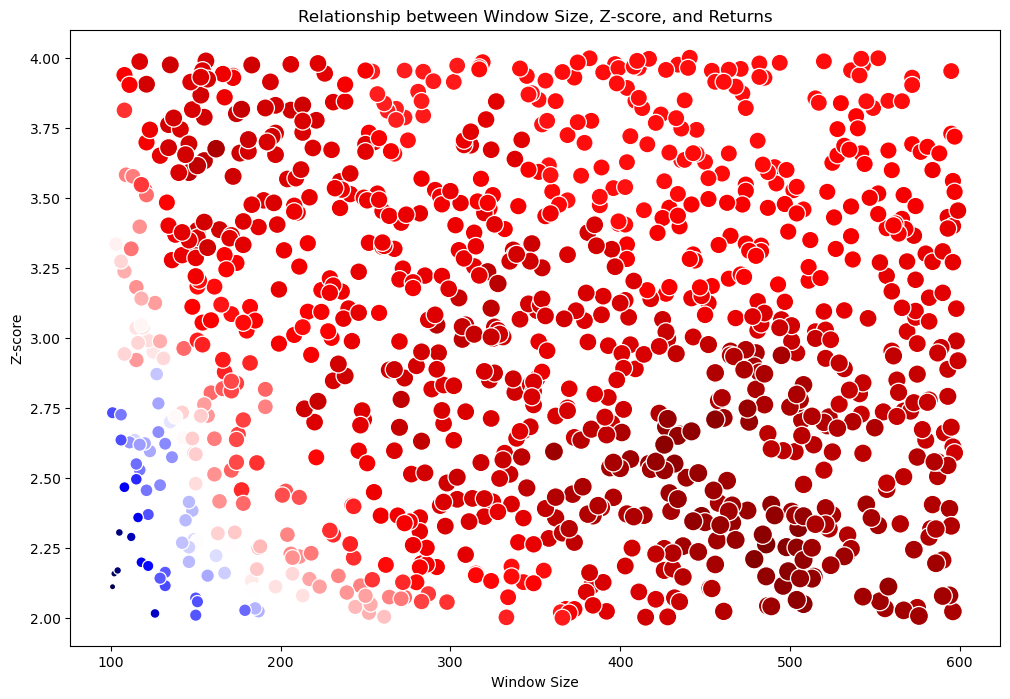

In [44]:
# Load the simulation results
with open('1H_simulation_results.json', 'r') as f:
    simulation_results_1H = json.load(f)

# Convert the results to a DataFrame
df = pd.DataFrame(simulation_results_1H)
# df['return_cat'] = np.where(df['returns'] > 0, 'Positive', 'Negative')
# df['size_returns'] = df['returns'].abs()

# Create the scatter plot with color representing returns
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    data=df,
    x='window',
    y='z_score',
    hue='returns',
    palette='seismic',
    size='returns',
    sizes=(20, 200),
    legend=None
)

plt.title('Relationship between Window Size, Z-score, and Returns')
plt.xlabel('Window Size')
plt.ylabel('Z-score')

plt.show()